In [2]:
import string
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
#from sklearn.cross_validation import KFold
from sklearn import svm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
with open('fake_classification.txt','r') as infile:
    x=[[float(dato) for dato in line.rstrip().split(' ')] for line in infile]
x = array(x)

num_data=shape(x)[0]
num_training = int(round(0.75*num_data))
num_test = num_data-num_training

training_index = array(random.permutation(num_data)[:num_training])
test_index = array(list(set(arange(num_data))-set(training_index)))

Datos_training = x[training_index,:]
Datos_test = x[test_index,:]

In [4]:
#Se realiza el entrenamiento
reg = svm.SVC(kernel="linear")
reg.fit(Datos_training[:,0:2], Datos_training[:,2])

#Se calcula una predicción sobre los datos de prueba
prediction=reg.predict(Datos_test[:,0:2])

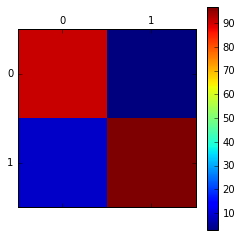

In [5]:
#Se halla la matriz de confusión a partir de los datos de prueba
Matriz_conf=confusion_matrix(Datos_test[:,2],prediction)
matshow(Matriz_conf)
colorbar()

In [6]:
# get the separating hyperplane
w = reg.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (reg.intercept_[0]) / w[1]

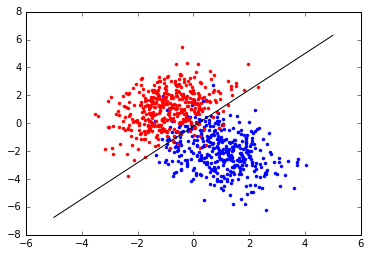

In [7]:
plot(x[x[:,2]==1.0,0],x[x[:,2]==1.0,1],'.b')
plot(x[x[:,2]==0.0,0],x[x[:,2]==0.0,1],'.r')
plot(xx,yy,'k')

In [8]:
Matriz_conf

array([[91,  3],
       [ 9, 97]])